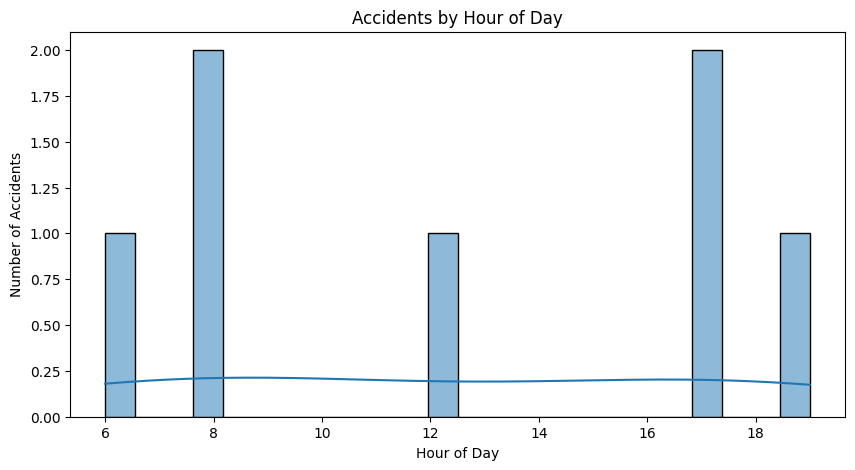

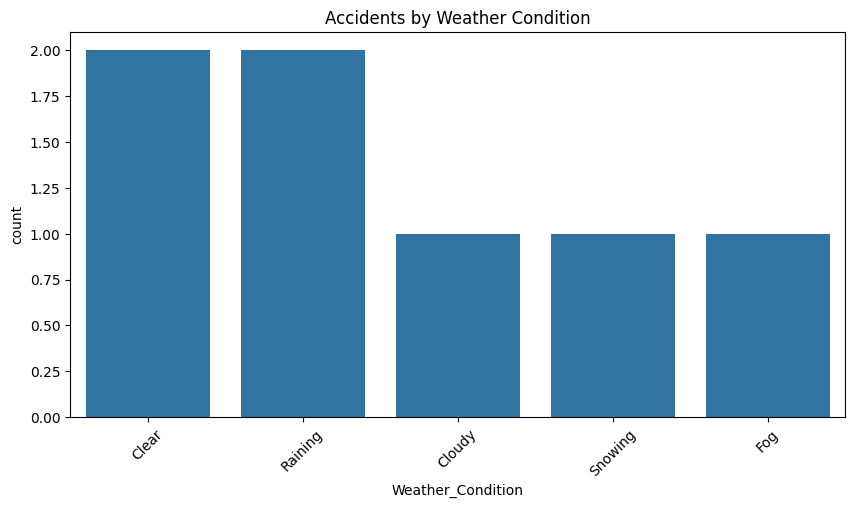

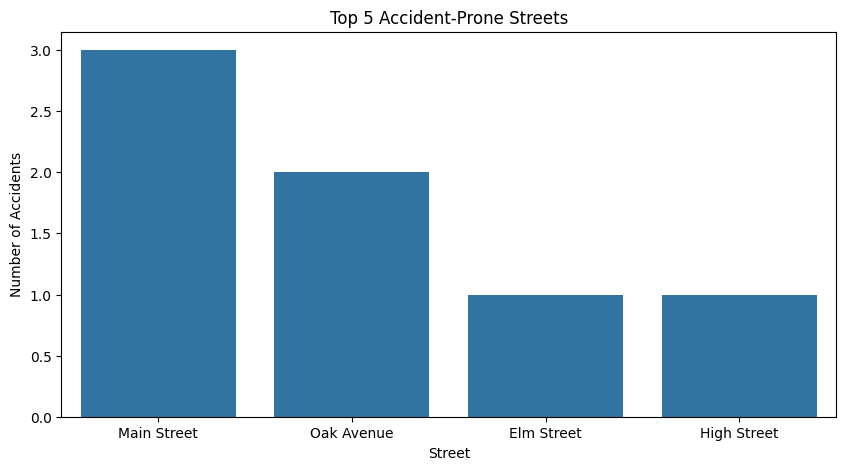

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load Sample Dataset
data = {
    'Start_Time': ['2023-01-15 08:30:00', '2023-02-20 17:15:00', '2023-03-10 12:45:00',
                   '2023-04-05 19:00:00', '2023-05-12 06:20:00', '2023-01-15 08:30:00',
                   '2023-02-20 17:15:00'],
    'Street': ['Main Street', 'Oak Avenue', 'Main Street', 'Elm Street', 'High Street', 'Oak Avenue',
               'Main Street'],
    'Weather_Condition': ['Clear', 'Raining', 'Cloudy', 'Snowing', 'Fog', 'Clear', 'Raining'],
    'Severity': [2, 4, 3, 2, 1, 2, 4],
    'Latitude': [40.7128, 34.0522, 40.7128, 41.8781, 37.7749, 34.0522, 40.7128],
    'Longitude': [-74.0060, -118.2437, -74.0060, -87.6298, -122.4194, -118.2437, -74.0060]
}
df = pd.DataFrame(data)

# Data Preparation
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

# Analysis and Visualization

# 1. Accidents by Hour
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# 2. Accidents by Weather Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather_Condition')
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()

# 3. Top Accident Locations (Streets)
top_streets = df['Street'].value_counts().head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_streets.index, y=top_streets.values)
plt.title('Top 5 Accident-Prone Streets')
plt.xlabel('Street')
plt.ylabel('Number of Accidents')
plt.show()

# 4. Map Visualization (Accident Hotspots)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Severity'] * 3,  # Scale radius based on severity
        popup=f"Street: {row['Street']}<br>Weather: {row['Weather_Condition']}",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(accident_map)

accident_map.save("accident_map.html")

